# Лабораторна робота 04

## 1. Завдання лабораторної роботи
Задачею є виконати передбачення на основі створених даних про подальші результати гри.

## 2. Опис використаних технологій
Для виконання задачі я використав
- Jupyter Notebook для кращої візуалізації
- Мову Python

Бібліотеки
- `numpy` для математичних операцій
- `pandas` для маніпуляцій з даними
- `matplotlib` для візуалізації графіків
- `scikit-learn` для моделі лінійної регресії, розбиття датасету на тестові і тренувальні дані, та метрики для аналізу результатуц 


## 3. Опис програмного коду
Весь код можна побачити нижче, а репозиторій можна знайти за адресою https://github.com/gazinaft/PIIS

### Імпорт бібліотек

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import model_selection
from sklearn.linear_model import LinearRegression

### Читання з файлу

In [2]:
df = pd.read_csv('./search/result.csv')

minimax = df[df.Agent == 'ExpectimaxAgent'][['Time', 'Score']]
expectimax = df[df.Agent == 'MiniMaxAgent'][['Time', 'Score']]
print(minimax)
print(expectimax)

    Time   Score
0    843   311.0
1     52  -401.0
2     73  -365.0
3    477   194.0
4     52  -401.0
5    164  -253.0
6    374    45.0
7    194  -169.0
8    259  -162.0
9    240  -158.0
10   144  -279.0
11    62  -383.0
12   929   344.0
13   913   337.0
14  1858  1098.0
15  1473  1125.0
16   139  -288.0
17  1299   840.0
18  1030   294.0
19   459   178.0
20   174  -235.0
21   473   145.0
22   162  -233.0
23  1267   596.0
24  1074   915.0
25   268   -54.0
26    52  -401.0
27   924   455.0
28   378    94.0
29    78  -366.0
    Time  Score
30   419  166.0
31   212 -133.0
32   777  374.0
33   454  139.0
34   298   10.0
35   177 -206.0
36   194 -199.0
37  1413 -393.0
38   258 -102.0
39   139 -288.0
40   757  538.0
41   354   39.0
42  2318 -574.0
43   704  389.0
44    52 -401.0
45   468   96.0
46  1092  381.0
47   194 -169.0
48   179 -216.0
49    53 -401.0
50   189 -218.0
51   834  403.0
52   174 -215.0
53   189 -168.0
54   738  302.0
55    67 -374.0
56    52 -401.0
57   233 -137.0
58   458 

### Розподіл даних

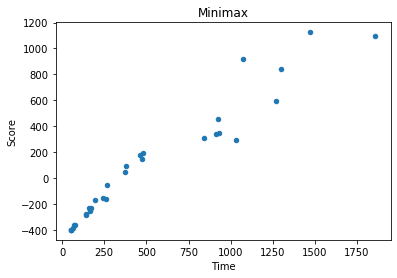

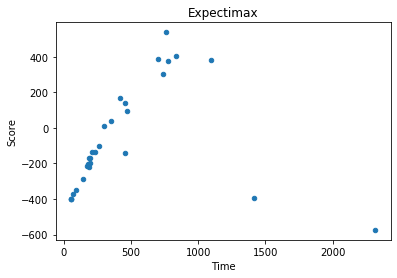

In [3]:
minimax.plot(x = 'Time', y = 'Score', kind = 'scatter', title = 'Minimax')
expectimax.plot(x = 'Time', y = 'Score', kind = 'scatter', title = 'Expectimax')
plt.show()

### Розподіл даних на тренувальні та контрольні

In [4]:
x_min_train, x_min_test, y_min_train, y_min_test = model_selection.train_test_split(
    minimax.Time, minimax.Score, test_size=0.25,
    random_state=42,
    shuffle=True,
)
x_exp_train, x_exp_test, y_exp_train, y_exp_test = model_selection.train_test_split(
    expectimax.Time, expectimax.Score, test_size=0.25,
    random_state=42,
    shuffle=True,

)

class_names = ['Time', 'Score']

### Тренування моделі

In [5]:
min_regr = LinearRegression()
exp_regr = LinearRegression()

min_regr.fit(np.array(x_min_train).reshape(-1, 1), np.array(y_min_train).reshape(-1, 1))
exp_regr.fit(np.array(x_exp_train).reshape(-1, 1), np.array(y_exp_train).reshape(-1, 1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Результати тренування моделі

In [6]:
min_preds = min_regr.predict(np.array(x_min_test).reshape(-1, 1))
exp_preds = exp_regr.predict(np.array(x_exp_test).reshape(-1, 1))

### Аналіз результатів досліджень

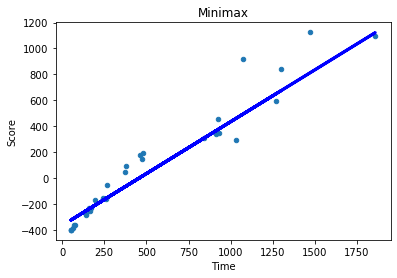

In [7]:
minimax.plot(x = 'Time', y = 'Score', kind = 'scatter', title = 'Minimax')
plt.plot(np.array(minimax.Time).reshape(-1, 1), min_regr.predict(np.array(minimax.Time).reshape(-1, 1)), color='blue', linewidth=3)
plt.show()

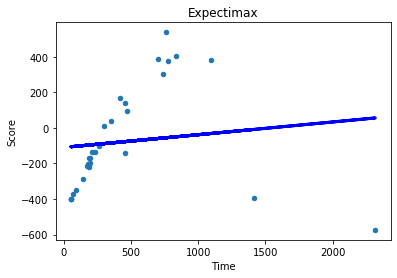

In [8]:
expectimax.plot(x = 'Time', y = 'Score', kind = 'scatter', title = 'Expectimax')
plt.plot(np.array(expectimax.Time).reshape(-1, 1), exp_regr.predict(np.array(expectimax.Time).reshape(-1, 1)), color='blue', linewidth=3)
plt.show()

### Перевірка на валідність результату
Результат валідний, якщо абсолютна помилка менше за стандартне відхилення

In [9]:
dev_min = np.std(y_min_train)
dev_exp = np.std(y_exp_train)

err_min = metrics.mean_absolute_error(y_pred=min_preds, y_true=y_min_test)
err_exp = metrics.mean_absolute_error(y_pred=exp_preds, y_true=y_exp_test)

print(dev_min > err_min)
print(dev_exp > err_exp)
print('Predicted results of ' + str(len(y_exp_test)) + ' games for expectimax')
print('Predicted results of ' + str(len(y_exp_test)) + ' games for minimax')

True
True
Predicted results of 8 games for expectimax
Predicted results of 8 games for minimax


### Висновки
У результаті я отимав 2 регресії. Обидві не перевищують критичні значення і робочі. Але регресія з експектімаксом виглядає дивно, через те, що агент експектімаксу знайшов оптимальну позицію і довго стояв на одному місці, і через це втрачав очки, а потім його знайшли привиди і він помер